# Tienda Steam 2024: Selecciones destacadas y reseñas 💨
## Acerca del conjunto de datos

### Descripción general:
Sumérgete en el pulso de la Tienda Steam con nuestro conjunto de datos «Clasificación de poder de la Tienda Steam 2024: Selecciones destacadas y reseñas». Esta colección compacta pero potente es su puerta de entrada a los títulos más comentados de 2024, ya que ofrece una instantánea de las tendencias, los precios de los juegos y la opinión colectiva de la comunidad de jugadores. Extraído de forma ética para garantizar el respeto de la privacidad y la integridad de los datos, este conjunto de datos es un testimonio del vibrante ecosistema de Steam, ya que proporciona una esencia destilada de la cultura de los videojuegos y la dinámica del mercado.
Aplicaciones de la ciencia de datos:

Dada su naturaleza específica, este conjunto de datos se presta a una variedad de exploraciones prácticas de ciencia de datos:

- Análisis de tendencias: Identifica patrones en la popularidad y los precios de los juegos a lo largo del tiempo.
- Análisis de opiniones: Evalúa la opinión de la comunidad a través de los resúmenes de las reseñas.
- Análisis de mercado: Comprende la correlación entre los precios, las ventas y las reseñas.
- Proyectos de visualización: Crea representaciones visuales atractivas de los datos para destacar las tendencias y los conocimientos clave.
   
## Descriptores de columnas:

- Title: The name of the game.
- Description: A brief overview of the game.
- Price: Listed price of the game.
- SalePercentage: The percentage discount if the game is on sale.
- RecentReviews: Generalized sentiment of recent reviews.
- AllReviews: Overall review sentiment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Carga de Datos

In [2]:
df = pd.read_csv('../../datasets/kaggle/steam_store_data_2024.csv')
df.head()

,title,description,price,salePercentage,recentReviews,allReviews
0,Ori and the Will of the Wisps,Play the critically acclaimed masterpiece. Emb...,$9.89,-67%,Overwhelmingly Positive,Overwhelmingly Positive
1,"Flashing Lights - Police, Firefighting, Emerge...",Play solo or in up to 10-player multiplayer co...,$8.49,-66%,Very Positive,Very Positive
2,Thronefall,A minimalist game about building and defending...,$5.24,-25%,Overwhelmingly Positive,Overwhelmingly Positive
3,DRAGON QUEST® XI S: Echoes of an Elusive Age™ ...,The Definitive Edition includes the critically...,$23.99,-40%,Very Positive,Very Positive
4,UNDYING,"As Anling’s zombie infection sets in, her days...",$13.99,-30%,Mostly Positive,Mostly Positive


In [3]:
df.shape

(86, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   title           86 non-null     object
 1   description     82 non-null     object
 2   price           61 non-null     object
 3   salePercentage  59 non-null     object
 4   recentReviews   57 non-null     object
 5   allReviews      57 non-null     object
dtypes: object(6)
memory usage: 4.2+ KB


In [5]:
df.describe()

,title,description,price,salePercentage,recentReviews,allReviews
count,86,82,61,59,57,57
unique,75,71,34,17,5,5
top,Ori and the Will of the Wisps,Play the critically acclaimed masterpiece. Emb...,$23.99,-40%,Very Positive,Very Positive
freq,2,2,6,10,40,40


In [6]:
df.isnull().sum()

title              0
description        4
price             25
salePercentage    27
recentReviews     29
allReviews        29
dtype: int64

In [7]:
df["recentReviews"].value_counts()

recentReviews
Very Positive              40
Mostly Positive             8
Overwhelmingly Positive     7
Mixed                       1
Mostly Negative             1
Name: count, dtype: int64

In [8]:
df["allReviews"].value_counts()

allReviews
Very Positive              40
Mostly Positive             8
Overwhelmingly Positive     7
Mixed                       1
Mostly Negative             1
Name: count, dtype: int64

## Limpieza de datos

In [9]:
# Limpiar las columnas de precios y porcentaje de descuento
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df['salePercentage'] = df['salePercentage'].replace({'%': '', ',': ''}, regex=True).astype(float)

df['price'].fillna(df['price'].mean(), inplace=True)
df['salePercentage'].fillna(0, inplace=True)
# Imputar valores faltantes con SimpleImputer
imputer = SimpleImputer(strategy="most_frequent")
df['description'] = imputer.fit_transform(df[['description']]).flatten()

# Convertir las columnas de reseñas a categorías ordenadas
review_order = ['Mostly Negative', 'Mixed', 'Mostly Positive', 'Very Positive', 'Overwhelmingly Positive']
df['recentReviews'] = pd.Categorical(df['recentReviews'], categories=review_order, ordered=True)
df['allReviews'] = pd.Categorical(df['allReviews'], categories=review_order, ordered=True)

# Imputación de missing values en las reseñas
df['recentReviews'] = imputer.fit_transform(df[['recentReviews']]).flatten()
df['allReviews'] = imputer.fit_transform(df[['allReviews']]).flatten()

In [10]:
print(df.info())

print(df.describe())

print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           86 non-null     object 
 1   description     86 non-null     object 
 2   price           86 non-null     float64
 3   salePercentage  86 non-null     float64
 4   recentReviews   86 non-null     object 
 5   allReviews      86 non-null     object 
dtypes: float64(2), object(4)
memory usage: 4.2+ KB
None
           price  salePercentage
count  86.000000       86.000000
mean   20.500984      -33.383721
std    10.884640       27.823464
min     3.490000      -80.000000
25%    12.715000      -60.000000
50%    20.500984      -34.000000
75%    23.990000        0.000000
max    59.990000        0.000000
title             0
description       0
price             0
salePercentage    0
recentReviews     0
allReviews        0
dtype: int64


## Análisis de datos

In [11]:
# Extraer palabras clave de las descripciones de los juegos
vectorizer = CountVectorizer(stop_words='english', max_df=0.40)
X = vectorizer.fit_transform(df['description'])

# Convertir la matriz en un DataFrame
df_words = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Mostrar las primeras 10 palabras más frecuentes
top_words = df_words.sum(axis=0).sort_values(ascending=False).head(10)
print(top_words)

world         29
new           27
play          20
action        19
adventure     14
kingdom       11
fantasy       11
player        10
experience    10
final          9
dtype: int64


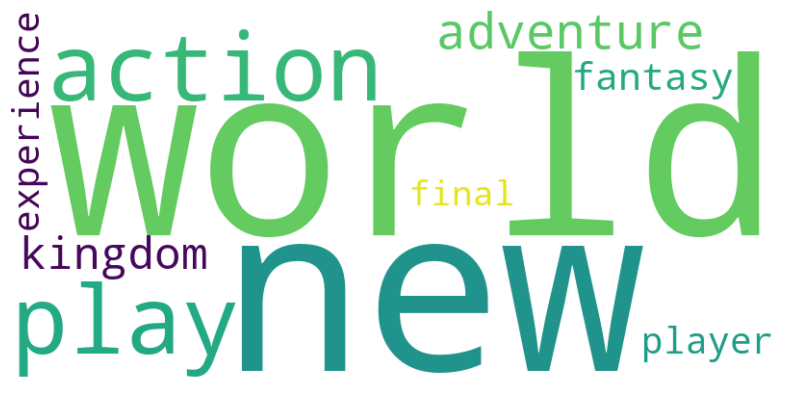

In [12]:
# Crear la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
# Definir las categorías y palabras clave relacionadas
gaming_categories = {
    'action': ['action', 'shooter', 'fight', 'horror'],
    'adventure': ['adventure', 'exploration'],
    'puzzle': ['puzzle'],
    'rpg': ['role', 'rpg'],
    'simulation': ['simulation'],
    'strategy': ['strategy', 'tactical'],
    'sports': ['sports']
}

# Crear una nueva columna para las categorías
df['category'] = np.nan

# Asignar categorías basadas en las palabras clave
for category, keywords in gaming_categories.items():
    for keyword in keywords:
        if keyword in df_words.columns:  # Comprobar si la palabra clave está en las columnas de df_words
            mask = df_words[keyword] > 0  # Verifica si la palabra clave está presente en cada fila
            df.loc[mask, 'category'] = category
        else:
            print(f"'{keyword}' no está en las columnas de df_words.")

df['category'].fillna('Unknow', inplace=True)

'simulation' no está en las columnas de df_words.
'sports' no está en las columnas de df_words.


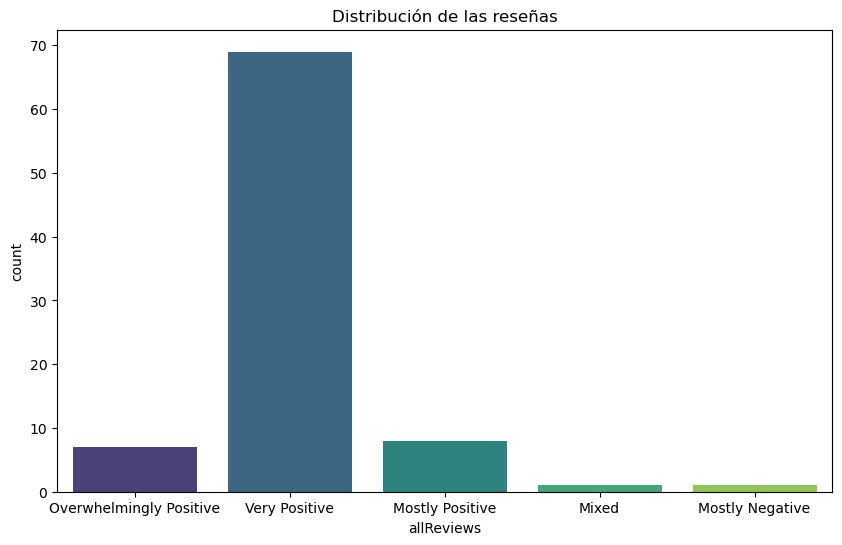

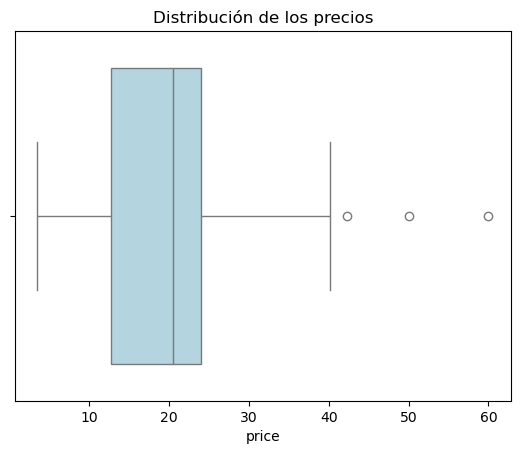

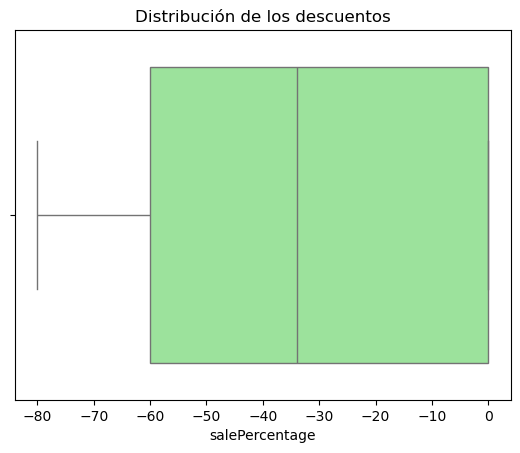

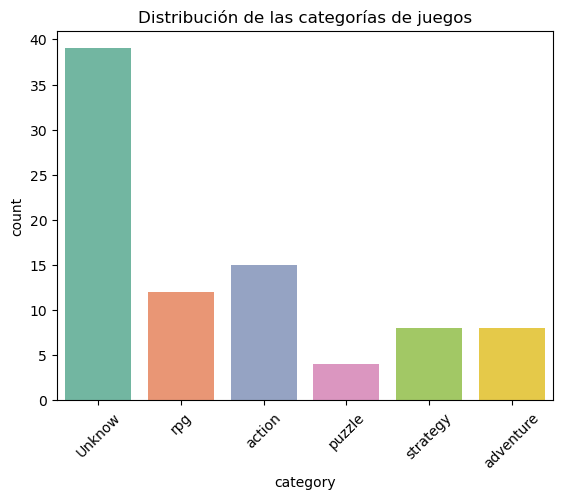

In [14]:
# Distribución de las reseñas (allReviews)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='allReviews', palette='viridis')
plt.title('Distribución de las reseñas')
plt.show()

# Distribución de los precios
sns.boxplot(data=df, x='price', color='lightblue')
plt.title('Distribución de los precios')
plt.show()

# Distribución de los descuentos
sns.boxplot(data=df, x='salePercentage', color='lightgreen')
plt.title('Distribución de los descuentos')
plt.show()

# Distribución de las categorías
sns.countplot(data=df, x='category', palette='Set2')
plt.title('Distribución de las categorías de juegos')
plt.xticks(rotation=45)
plt.show()

In [15]:
df.isnull().sum()

title             0
description       0
price             0
salePercentage    0
recentReviews     0
allReviews        0
category          0
dtype: int64

In [16]:
df.columns

Index(['title', 'description', 'price', 'salePercentage', 'recentReviews',
       'allReviews', 'category'],
      dtype='object')

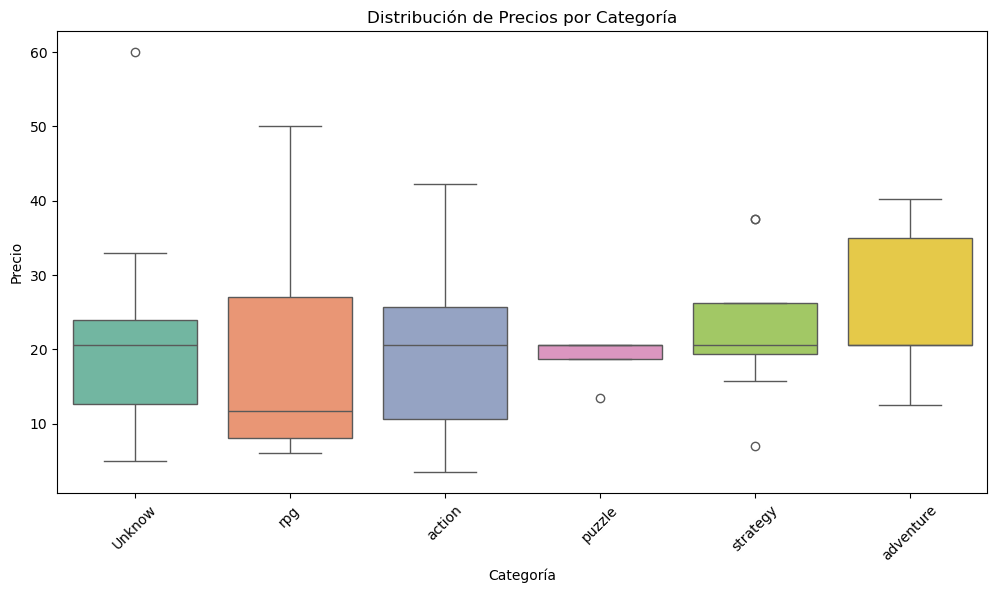

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='price', data=df, palette='Set2')
plt.title('Distribución de Precios por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Precio')
plt.xticks(rotation=45) 
plt.show()

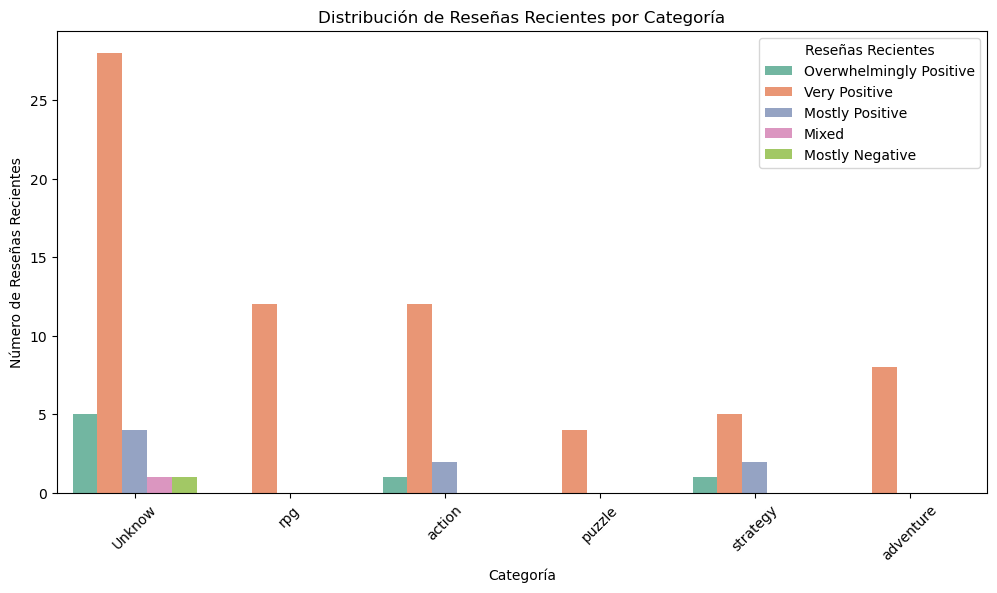

In [18]:
plt.figure(figsize=(12, 6))
sns.countplot(x='category', hue='recentReviews', data=df, palette='Set2')
plt.title('Distribución de Reseñas Recientes por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Número de Reseñas Recientes')
plt.xticks(rotation=45)
plt.legend(title='Reseñas Recientes')
plt.show()

## Conclusión
1. **Distribución de las categorías de juegos**: La mayoría de los juegos no tienen una categoría definida (`Unknown`), seguida de juegos de **RPG** y **acción**. Las categorías **puzzle**, **estrategia** y **aventura** tienen menos representación.

2. **Distribución de los precios**: Los precios de los juegos varían entre 10 y 60, con una mayoría de precios concentrados entre 10 y 30.

3. **Distribución de los descuentos**: Los descuentos están entre 80% y 0%, indicando que la mayoría de los juegos tienen descuentos significativos. Sin embargo, la mayoría están en un rango cercano al 30%.

4. **Distribución de las reseñas**: La gran mayoría de los juegos tienen reseñas **"Very Positive"**, con pocos juegos teniendo reseñas **"Mostly Positive"** o menos.

5. **Distribución de precios por categoría**: Los precios de los juegos varían según la categoría, siendo **"RPG"** y **"adventure"** las categorías con precios más altos, mientras que **"puzzle"** tiene precios más bajos en general.